# Figures for Light pollution sensors

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import importlib
import positioning_sensors as ps
importlib.reload(ps)
import regionGrowing as rg
importlib.reload(rg)
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable
#plt.style.use("seaborn-deep")
dpi_res = 150
figure(figsize=(15, 15), dpi=dpi_res)

<Figure size 2250x2250 with 0 Axes>

<Figure size 2250x2250 with 0 Axes>

In [2]:
# leyendo mapas

ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
luminance = ps.readIMG(ilumina)
nonsat,b = ps.desaturate(luminance,th=62)
NTLI = sp.ndimage.filters.gaussian_filter(nonsat, [0.5,0.5], mode='constant')
NTLI = (NTLI>=22)*NTLI

#EVM: Environtmental attention map is the importance
EVM = ps.readIMG(niveles,invert=False)

## Rounding Coordinates

In [7]:
#x1,y1 333747.2405000000144355,2249895.8226999999023974 : 382747.2405000000144355,2309895.8226999999023974
coordinates_x = [333747, 382747]
coordinates_y = [2309895, 2249895]


sx = (coordinates_x[1]-coordinates_x[0])/NTLI.shape[1]
sy = (coordinates_y[0]-coordinates_y[1])/NTLI.shape[0]
long_coordinates = np.arange(coordinates_x[0],coordinates_x[1]+1,sx)
lat_coordinates = np.arange(coordinates_y[1],coordinates_y[0]+1,sy)
print("longitude cell size in epsg coordinates:",(long_coordinates[1]-long_coordinates[0]))
print("latitude cell size in epsg coordinates:",(lat_coordinates[1]-lat_coordinates[0]))
rounded_coordinates_x = np.round(100*(np.round(long_coordinates/100))).astype(int)
rounded_coordinates_y = np.round(1000*(np.round(lat_coordinates/1000))).astype(int)

print("dont round more thatn +- 942.3/2 and +- 1000/2")


longitude cell size in epsg coordinates: 942.3076923076878
latitude cell size in epsg coordinates: 1000.0
dont round more thatn +- 942.3/2 and +- 1000/2


## NTLI

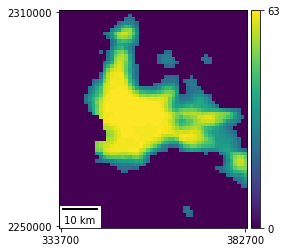

In [8]:
img = luminance*(EVM>0)
fig, ax = plt.subplots()
im = ax.imshow(img)


X_coords = rounded_coordinates_x
Y_coords = rounded_coordinates_y

ax.set_xticks([0,NTLI.shape[1]-1],[X_coords[0],X_coords[-1]])
ax.set_yticks([0,NTLI.shape[0]-1],[Y_coords[-1],Y_coords[0]])
ax.add_artist(ScaleBar(1000,location='lower left'))


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax,ticks=[0, np.max(img)])

plt.show()
fig.savefig('ntli.eps', format='eps', dpi=dpi_res)

## EVM

NameError: name 'mpatches' is not defined

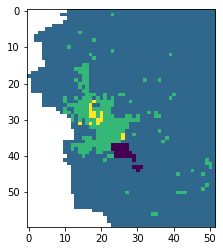

In [10]:
EVM = ps.readIMG(niveles,invert=False)

fig, ax = plt.subplots()
im = ax.imshow(EVM)


X_coords = rounded_coordinates_x
Y_coords = rounded_coordinates_y
values = np.array(["Natural Areas","Rural","Urban","Commerce"])
colors = [ im.cmap(im.norm(value)) for value in range(len(values))]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=values2[i]) ) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(0.70, 0.65), loc=8, borderaxespad=0. )

ax.set_xticks([0,NTLI.shape[1]-1],[X_coords[0],X_coords[-1]])
ax.set_yticks([0,NTLI.shape[0]-1],[Y_coords[-1],Y_coords[0]])
ax.add_artist(ScaleBar(1000,location='lower left'))

plt.show()
fig.savefig('evm.eps', format='eps', dpi=dpi_res)

 W = i*a^(p)


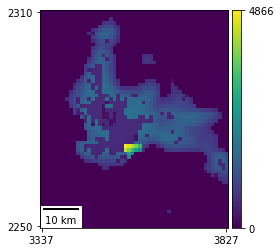

In [36]:
EVM = ps.readIMG(niveles,invert=True)
img = ps.f5(NTLI,EVM,3)


fig, ax = plt.subplots()
im = ax.imshow(img)


X_coords = rounded_coordinates_x
Y_coords = rounded_coordinates_y

ax.set_xticks([0,NTLI.shape[1]-1],[X_coords[0],X_coords[-1]])
ax.set_yticks([0,NTLI.shape[0]-1],[Y_coords[-1],Y_coords[0]])
ax.add_artist(ScaleBar(1000,location='lower left'))


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax,ticks=[0, np.max(img)])


plt.show()
fig.savefig('sensitivity.eps', format='eps', dpi=dpi_res)

NameError: name 'data' is not defined

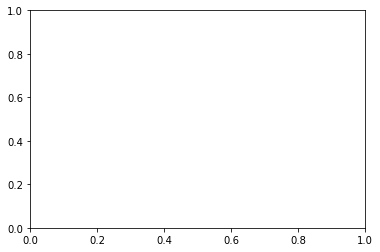

<Figure size 576x288 with 0 Axes>

In [11]:

import matplotlib.patches as mpatches

fig, ax = plt.subplots()
#im = ax.imshow(data)

# create some data

# get the unique values from data
# i.e. a sorted list of all values in data

#values = np.array(["Natural Areas","Rural","Urban","Commerce"])

plt.figure(figsize=(8,4))
im = plt.imshow(data, interpolation='none')

# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=values2[i]) ) for i in range(len(values)-1) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(0.70, 0.65), loc=8, borderaxespad=0. )



plt.xticks([0,NTLI.shape[1]-1],[X_coords[0],X_coords[-1]])
plt.yticks([0,NTLI.shape[0]-1],[Y_coords[-1],Y_coords[0]])

plt.grid(False)


plt.savefig('evm2.eps', format='eps', dpi=dpi_res)

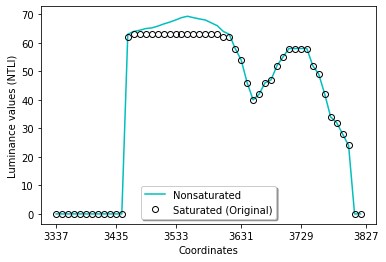

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [38]:
fig, ax = plt.subplots()

X = rounded_coordinates_x
step =  (X[-1]-X[0])/5

ticks_for_plot = np.arange(X[0],X[-1]+1,step).astype(int)
step_post_ticks = (NTLI.shape[1])/(len(ticks_for_plot)-1)

pos_ticks =  np.arange(0,NTLI.shape[1]+1,step_post_ticks).astype(int)


ax.set_xlabel("Coordinates")
ax.set_ylabel("Luminance values (NTLI)")
#ax.plot(luminance[30,:],"-o")

ax.plot(nonsat[30,:],"c")
ax.plot(luminance[30,:],"ko",fillstyle='none')

ax.set_xticks(pos_ticks,ticks_for_plot)


ax.legend(("Nonsaturated","Saturated (Original)"),loc='lower center', shadow=True)
plt.show()


fig.savefig('satvsnonsat.eps', format='eps', dpi=dpi_res)

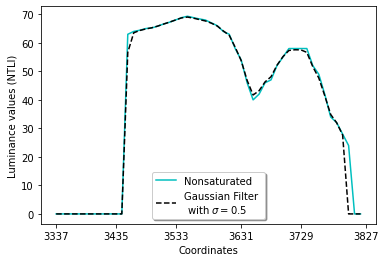

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [39]:
fig, ax = plt.subplots()

ax.set_xlabel("Coordinates")
ax.set_ylabel("Luminance values (NTLI)")
#ax.plot(luminance[30,:],"-o")
ax.plot(nonsat[30,:],"c")
ax.plot(NTLI[30,:],"k--",fillstyle='none')
ax.set_xticks(pos_ticks,ticks_for_plot)

ax.legend(("Nonsaturated","Gaussian Filter \n with $\sigma=0.5$"),loc='lower center', shadow=True)
plt.show()


fig.savefig('gaussianFiltered.eps', format='eps', dpi=dpi_res)

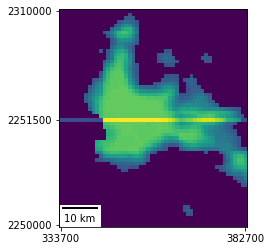

In [12]:
fig, ax = plt.subplots()

luminance_copy = np.copy(luminance)
luminance_copy[30,:]=luminance_copy[30,:]+20



coordinates_x = [rounded_coordinates_x[0], rounded_coordinates_x[-1]]
line_sample = np.array(rounded_coordinates_y[1]-(((rounded_coordinates_y[0]-rounded_coordinates_y[1])/luminance.shape[0])*30)).astype(int)
coordinates_y_ext = [rounded_coordinates_y[-1],line_sample, rounded_coordinates_y[0]]


ax.imshow(luminance_copy)
#ax.set_xlabel("Latitude")
#ax.set_ylabel("Longitude")
ax.set_xticks([0,NTLI.shape[1]-1],coordinates_x,rotation = 0)
ax.set_yticks([0,30,NTLI.shape[0]-1,],coordinates_y_ext,rotation = 0)
ax.add_artist(ScaleBar(1000,location='lower left'))


plt.show()
fig.savefig('longitudeSample.eps', format='eps', dpi=dpi_res)

 W = i*a^(p)


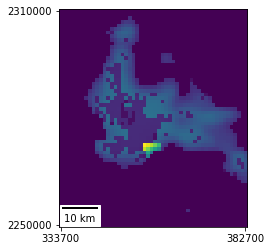

In [13]:
EVM = ps.readIMG(niveles,invert=True)
sensitivity = ps.f5(NTLI,EVM,3)


fig, ax = plt.subplots()
im = ax.imshow(sensitivity)


#x1,y1 333747.2405000000144355,2249895.8226999999023974 : 382747.2405000000144355,2309895.8226999999023974
coordinates_x = [rounded_coordinates_x[0], rounded_coordinates_x[-1]]
coordinates_y = [rounded_coordinates_y[-1], rounded_coordinates_y[0]]

ax.set_xticks([0,NTLI.shape[1]-1],coordinates_x)
ax.set_yticks([0,NTLI.shape[0]-1],coordinates_y)
ax.add_artist(ScaleBar(1000,location='lower left'))
plt.show()
fig.savefig('sensitivity.eps', format='eps', dpi=350)

In [16]:
y = np.arange(0,NTLI.shape[0])
x = np.arange(0,NTLI.shape[1])
Y, X = np.meshgrid(y, x)


In [17]:
nonsat = ps.desaturate(NTLI,th=62)
y = np.arange(0,luminance.shape[0])
x = np.arange(0,luminance.shape[1])



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


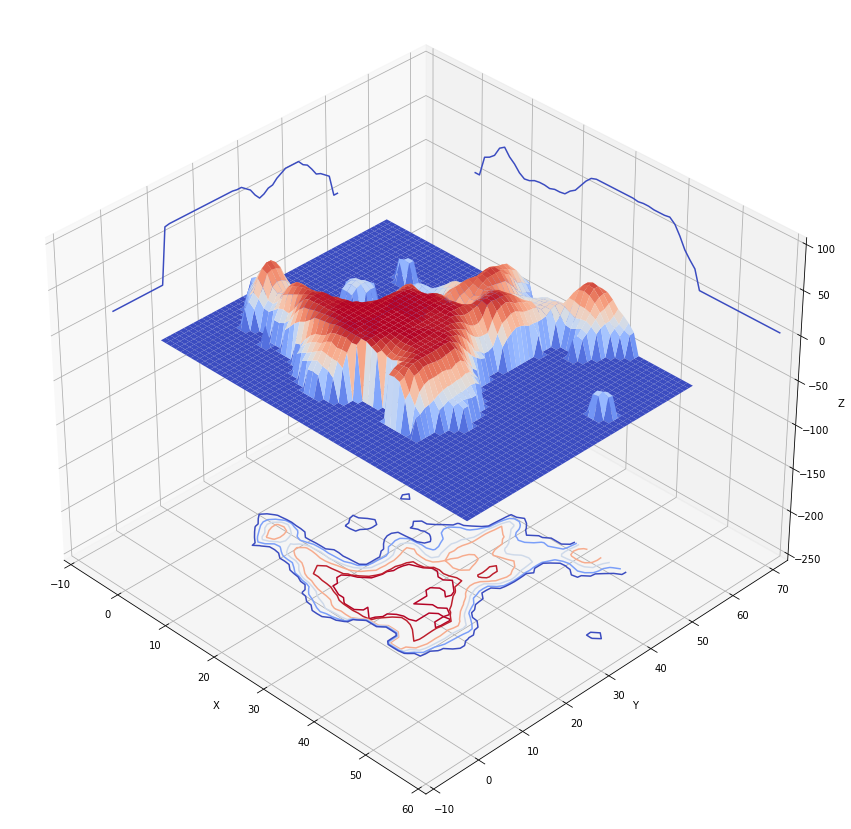

In [18]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm


#ax = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

# Plot the 3D surface
Z = luminance.T 
ax.plot_surface(Y, X, Z, rstride=1, cstride=1, alpha=1,cmap=cm.coolwarm)


cset = ax.contour(Y, X, Z, zdir='z', offset=-250, cmap=cm.coolwarm,levels=[22,30,40,50,luminance.max()-2,luminance.max()-1])
cset = ax.contour(Y, X, Z, zdir='x', offset=-10, cmap=cm.coolwarm, levels=[30])
cset = ax.contour(Y, X, Z, zdir='y', offset=luminance.shape[1]+20,cmap=cm.coolwarm,levels=[20])
ax.view_init(35, -45)
ax.set_xlabel('X')
ax.set_xlim(-10,luminance.shape[0])
ax.set_ylabel('Y')
ax.set_ylim(-10, luminance.shape[1]+20)
ax.set_zlabel('Z')
ax.set_zlim(-250, 100)
fig.savefig('tridimensionalLight_saturated.eps', format='eps', dpi=dpi_res)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


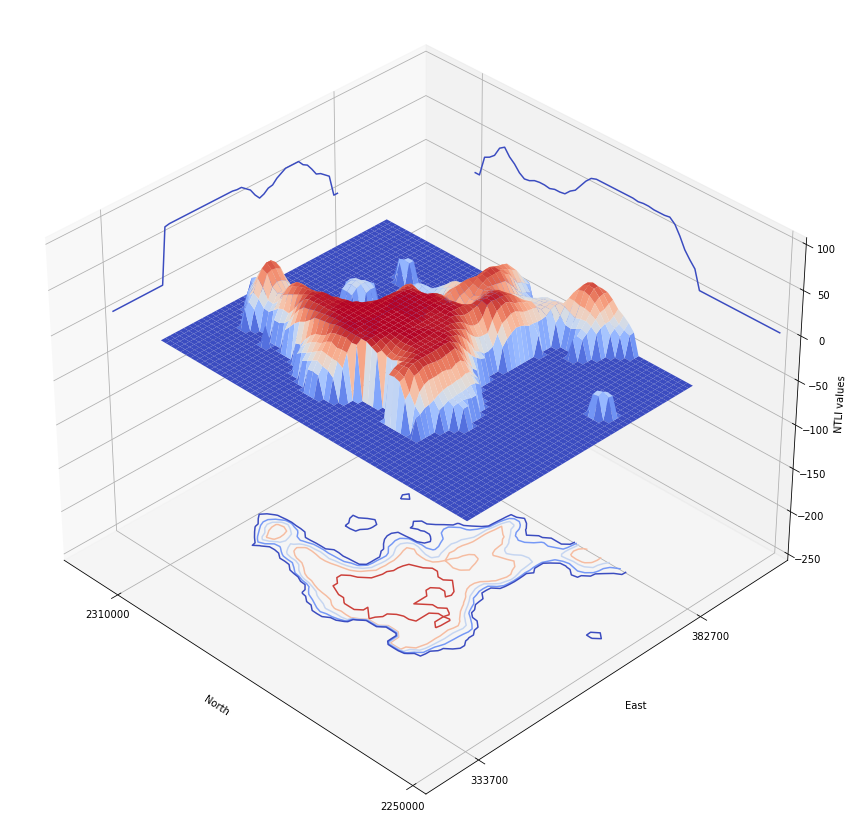

In [19]:
Z,ZZ = ps.desaturate(luminance,th=62)
Z = luminance.T

#ax = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

# Plot the 3D surface

ax.plot_surface(Y, X, Z, rstride=1, cstride=1, alpha=1,cmap=cm.coolwarm)


cset = ax.contour(Y, X, Z, zdir='z', offset=-250, cmap=cm.coolwarm,levels=[22,30,40,50,luminance.max()-1,luminance.max(),luminance.max()+2])
cset = ax.contour(Y, X, Z, zdir='x', offset=-10, cmap=cm.coolwarm, levels=[30])
cset = ax.contour(Y, X, Z, zdir='y', offset=luminance.shape[1]+20,cmap=cm.coolwarm,levels=[20])
ax.view_init(35, -45)
ax.set_xlabel('North')
ax.set_xlim(-10,luminance.shape[0])
ax.set_ylabel('East')
ax.set_ylim(-10, luminance.shape[1]+20)
ax.set_zlabel('NTLI values')
ax.set_zlim(-250, 100)
ax.set_yticks([0,NTLI.shape[1]],[X_coords[0],X_coords[-1]])
ax.set_xticks([0,NTLI.shape[0]-1],[Y_coords[-1],Y_coords[0]])
fig.savefig('tridimensionalLight_saturated.eps', format='eps', dpi=300)

In [16]:
from skimage.draw import line_aa

si = (25,24)

#plt.imshow(NTLI)
c=10
ccc = 2
data = np.copy(nonsat)
data_c = np.copy(nonsat)
rr, cc, val = line_aa(si[0]-c, si[1]-c, si[0]-c, si[1]+c)
data[rr, cc] = val * np.max(data_c)/ccc
rr, cc, val = line_aa(si[0]-c, si[1]+c, si[0]+c, si[1]+c)
data[rr, cc] = val * np.max(data_c)/ccc
rr, cc, val = line_aa(si[0]+c, si[1]+c,si[0]+c, si[1]-c)
data[rr, cc] = val * np.max(data_c)/ccc
rr, cc, val = line_aa(si[0]+c, si[1]-c,si[0]-c, si[1]-c)
data[rr, cc] = val * np.max(data_c)/ccc
rr, cc, val = line_aa(si[0], si[1],si[0], si[1])
data[rr, cc] = val * np.max(data_c)*0

ValueError: shape mismatch: value array of shape (21,) could not be broadcast to indexing result of shape (21,52)

TypeError: Invalid shape (2, 60, 52) for image data

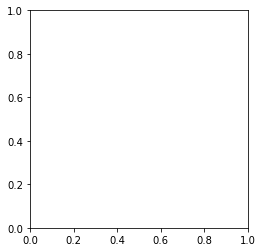

In [17]:

fig, ax = plt.subplots()
im = ax.imshow(data)


X_coords = rounded_coordinates_x
Y_coords = rounded_coordinates_y

ax.set_xticks([0,NTLI.shape[1]-1],[X_coords[0],X_coords[-1]])
ax.set_yticks([0,NTLI.shape[0]-1],[Y_coords[-1],Y_coords[0]])
ax.add_artist(ScaleBar(1000,location='lower left'))


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax,ticks=[0, 100,200])

plt.show()
fig.savefig('semivariance_example.eps', format='eps', dpi=dpi_res)

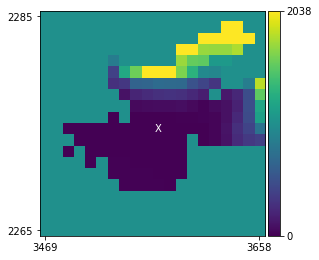

In [120]:
atol = 15
dtol = 0.5
params = {"type": "semivar", 
          "si": si, 
          "atol": atol, 
          "dtol": dtol}

#EAM: Environtmental attention map is the importance
#EAM = ps.readIMG(niveles,invert=True)
#EAM[37][23]+=1


#smoothing parameters
sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]
nonsat,z = ps.desaturate(luminance,th=62)
nonsat2 = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')
nonsat2 = (nonsat2>=22)*nonsat2

rG = rg.rGrowing(nonsat2)
rG.setParams(params)

sv1 = rG.makeSemivarianceMap(si)
m = ps.constructMask(si,sv1)

out = (m==1)
A = ((out==0)*np.max(sv1)/2)+sv1*out

recorte = A[si[0]-c:si[0]+c,si[1]-c:si[1]+c]

img = recorte

fig, ax = plt.subplots(figsize=(4,4))
im = ax.imshow(img)
for i in range((img.shape[0])):
    for j in range(img.shape[1]):
        if int(img[i, j])!=1019:
            if int(img[i, j])<710:
                if (i== int(img.shape[0]/2) and j==int(img.shape[1]/2)):
                    text = ax.text(j, i, "X", ha="center", va="center", color="white")
  #              else:
                 #   text = ax.text(j, i, int(img[i, j]), ha="center", va="center", color="white")
 #           else:
               # text = ax.text(j, i, int(img[i, j]), ha="center", va="center", color="black")

fig.tight_layout()




plt.xticks([0,img.shape[1]-1],[X_coords[si[1]-c],X_coords[si[1]+c]])
plt.yticks([0,img.shape[0]-1],[Y_coords[si[0]+c],Y_coords[si[0]-c]])


cm = plt.imshow(img)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax,ticks=[0, np.max(img)])

plt.show()
                                                
fig.savefig('exampleSV.eps', format='eps', dpi=dpi_res)

In [18]:
recorte.shape

(20, 20)

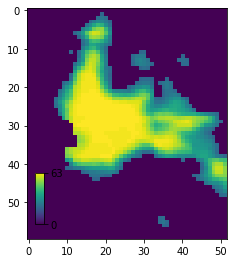

In [20]:
#import matplotlib.pyplot as plt
#import importlib
#import positioning_sensors as ps
#importlib.reload(ps)
    
params = {"text.color" : "white",
          "xtick.color" : "black",
          "ytick.color" : "black"}

plt.rcParams.update(params)

#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'

#NLTI: luminance
luminance = ps.readIMG(ilumina)

cm = plt.imshow(luminance)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.25, 0.15, 0.02, 0.18])
plt.colorbar(cax=cax,ticks=[0, np.max(luminance)])


plt.savefig('fig_desaturation_01.eps', format='eps', dpi=dpi_res)
plt.show()

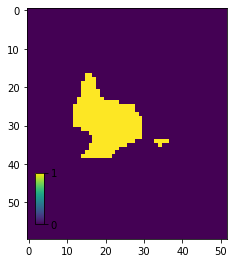

In [31]:


#params = {"text.color" : "black",
#          "xtick.color" : "white",
#          "ytick.color" : "white"}
#plt.rcParams.update(params)

#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'

#NLTI: luminance
luminance = ps.readIMG(ilumina)

nonsat,distance = ps.desaturate(luminance,th=62)


cm = plt.imshow(luminance>=62)

red_patch = mpatches.Patch(color='red', label='The red data')
ax.legend(handles=[red_patch])

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.25, 0.15, 0.02, 0.18])
plt.colorbar(cax=cax,ticks=[0, 1])



plt.savefig('fig_desaturation_02.eps', format='eps', dpi=dpi_res)

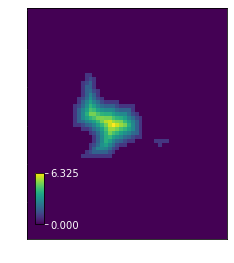

In [103]:
import matplotlib.pyplot as plt
import importlib
import positioning_sensors as ps
importlib.reload(ps)

params = {"text.color" : "black",
          "xtick.color" : "white",
          "ytick.color" : "white"}
plt.rcParams.update(params)

#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'

#NLTI: luminance
luminance = ps.readIMG(ilumina)

nonsat,distance = ps.desaturate(luminance,th=62)

cm = plt.imshow(distance)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.25, 0.15, 0.02, 0.18])
plt.colorbar(cax=cax,ticks=[0, np.max(distance)])

plt.savefig('fig_desaturation_03.eps', format='eps', dpi=dpi_res)

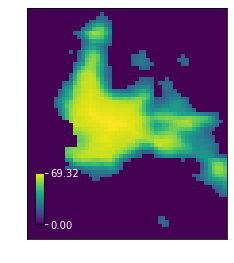

In [104]:
nonsat,distance = ps.desaturate(luminance,th=62)

cm = plt.imshow(nonsat)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.25, 0.15, 0.02, 0.18])
plt.colorbar(cax=cax,ticks=[0, np.max(nonsat)])

plt.savefig('fig_desaturation_04.eps', format='eps', dpi=dpi_res)

References  
https://matplotlib.org/3.5.0/gallery/mplot3d/contourf3d_2.html#sphx-glr-gallery-mplot3d-contourf3d-2-py

https://matplotlib.org/3.5.0/gallery/axes_grid1/simple_colorbar.html#sphx-glr-gallery-axes-grid1-simple-colorbar-py

https://www.tutorialspoint.com/how-to-add-legend-to-imshow-in-matplotlib

https://matplotlib.org/3.5.0/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html

https://matplotlib.org/3.5.0/gallery/lines_bars_and_markers/masked_demo.html